# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


## Implementing Thompson Sampling

In [68]:
import random

N = 10000
d= 10
selection_order =[] 
reward_1 = [0]*d 
reward_0 = [0]*d
total_reward = 0
selection_list =[0]*d
for n in range(0,N):
    winner = 0
    max_beta = 0
    for i in range(0,d):
        beta = random.betavariate(reward_1[i]+1,reward_0[i]+1) #in bracket is alpha,beta-- mean and std.. dist is between 0-1
        if beta>max_beta:
            max_beta = beta
            winner = i
    selection_order.append(winner)
    selection_list[winner] = selection_list[winner] +1 
    reward = dataset.values[n,winner]
    if reward == 1:
        reward_1[winner]= reward_1[winner]+1
    else:
        reward_0[winner] = reward_0[winner]+1
    total_reward = total_reward + reward 





In [69]:
selection_order

[7,
 9,
 3,
 1,
 2,
 1,
 1,
 2,
 6,
 1,
 4,
 8,
 0,
 5,
 7,
 9,
 7,
 8,
 0,
 1,
 5,
 0,
 9,
 8,
 6,
 8,
 6,
 8,
 1,
 1,
 6,
 3,
 1,
 3,
 2,
 7,
 3,
 5,
 1,
 3,
 0,
 3,
 7,
 4,
 7,
 7,
 4,
 1,
 5,
 7,
 6,
 6,
 8,
 4,
 4,
 4,
 6,
 4,
 3,
 4,
 6,
 5,
 9,
 4,
 4,
 1,
 4,
 7,
 9,
 9,
 4,
 4,
 4,
 8,
 4,
 1,
 9,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 3,
 8,
 1,
 7,
 0,
 4,
 5,
 2,
 4,
 9,
 7,
 7,
 4,
 7,
 4,
 8,
 7,
 7,
 4,
 4,
 4,
 2,
 0,
 0,
 8,
 4,
 0,
 4,
 8,
 8,
 6,
 4,
 9,
 9,
 3,
 4,
 8,
 1,
 8,
 4,
 7,
 0,
 4,
 8,
 7,
 9,
 4,
 5,
 3,
 8,
 7,
 4,
 4,
 4,
 4,
 1,
 4,
 3,
 4,
 4,
 4,
 0,
 4,
 1,
 4,
 8,
 3,
 2,
 4,
 2,
 8,
 8,
 8,
 1,
 7,
 8,
 7,
 4,
 4,
 4,
 8,
 7,
 9,
 4,
 7,
 8,
 4,
 7,
 8,
 4,
 8,
 8,
 4,
 4,
 2,
 7,
 4,
 1,
 4,
 4,
 7,
 4,
 1,
 6,
 1,
 4,
 1,
 0,
 4,
 8,
 8,
 7,
 8,
 0,
 8,
 4,
 4,
 6,
 4,
 8,
 7,
 4,
 2,
 5,
 4,
 0,
 4,
 1,
 6,
 4,
 4,
 4,
 6,
 8,
 2,
 4,
 4,
 5,
 1,
 4,
 9,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 7,
 4,
 8,
 7,
 6,
 4,
 7,
 4,
 4,
 4,
 3,
 4,
 0,
 4,
 4,


In [70]:
selection_list

[116, 128, 60, 38, 8928, 26, 91, 455, 106, 52]

In [71]:
reward_1

[19, 20, 6, 2, 2414, 0, 12, 102, 15, 4]

In [54]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [53]:
ads_selected

[8,
 5,
 0,
 8,
 1,
 6,
 8,
 9,
 5,
 2,
 1,
 7,
 8,
 3,
 4,
 8,
 2,
 0,
 3,
 2,
 4,
 0,
 2,
 6,
 5,
 9,
 2,
 9,
 1,
 3,
 1,
 5,
 7,
 8,
 0,
 2,
 1,
 2,
 5,
 6,
 4,
 3,
 1,
 8,
 5,
 5,
 9,
 7,
 2,
 4,
 8,
 4,
 6,
 4,
 6,
 6,
 4,
 4,
 7,
 4,
 0,
 4,
 4,
 2,
 4,
 0,
 8,
 3,
 4,
 4,
 4,
 4,
 3,
 0,
 5,
 4,
 8,
 7,
 8,
 7,
 2,
 0,
 0,
 9,
 7,
 3,
 4,
 1,
 5,
 3,
 7,
 8,
 0,
 4,
 6,
 0,
 6,
 2,
 7,
 4]

In [6]:
numbers_of_rewards_0

[96, 59, 58, 49, 6711, 24, 52, 242, 78, 26]

In [7]:
numbers_of_rewards_1

[16, 6, 6, 4, 2493, 0, 6, 61, 13, 0]

In [8]:
total_reward

2605

In [9]:
random_beta

0.0035521216789988668

In [16]:
random.betavariate(numbers_of_rewards_1[1] + 1, numbers_of_rewards_0[1] + 1)

0.1307659975829477

In [107]:
random.betavariate(10,0.5)

0.8897101986062769

In [50]:
random.betavariate(2,1)

0.60940400715218

## Visualising the results - Histogram

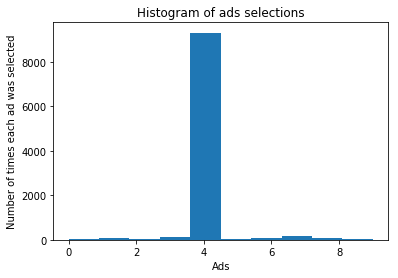

In [28]:
plt.hist(selection_order)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()